<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

#### Overveiw

The project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) to determine the best properties to buy and re-sell. Specifically, the project aims to identify the characteristics of residential houses that estimate the sale price and the cost-effectiveness of doing renovations.

#### Objective

There are three components to the project:

1. Estimate the sale price of properties based on their "fixed" characteristics, such as neighborhood, lot size, number of stories, etc.
2. Estimate the value of possible changes and renovations to properties from the variation in sale price not explained by the fixed characteristics. The goal is to estimate the potential return on investment (and how much you should be willing to pay contractors) when making specific improvements to properties.
3. Determine the features in the housing data that best predict "abnormal" sales (forclosures, etc.).





In [110]:
# import nescessary libraries
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score


sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

 ## 1. Estimating the value of homes from fixed characteristics.

---
In the first section, There are three components to identify the value of homes from fixed characteristics:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Based on the data description, the list of fixed and renovatable characteristics is listed below:

Fixed features:

'MSSubClass', 'MSZoning','LotFrontage', 'LotArea', 'Street', 'Alley','LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope','Neighborhood','BldgType', 'HouseStyle','YearBuilt', 'YearRemodAdd', 'RoofStyle','MasVnrArea', 
'Foundation','BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Functional', 'Fireplaces','GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch',
'ScreenPorch', 'PoolArea','MiscFeature', 'MiscVal','MoSold', 'YrSold','SaleType'


Renovatable features:

'Condition1', 'Condition2','OverallQual', 'OverallCond','RoofMatl', 'Exterior1st', 'Exterior2nd', 
'MasVnrType','ExterQual', 'ExterCond','BsmtQual', 'BsmtCond','BsmtFinType1','BsmtFinType2','Heating', 'HeatingQC',
'CentralAir', 'Electrical','KitchenQual','FireplaceQu','GarageQual', 'GarageCond',
'PavedDrive','PoolQC','Fence','SaleCondition'

### Import the necessary libraries

In [111]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score


sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


## EDA

In [112]:
# import the data use read.csv
house = pd.read_csv('./housing.csv')

In [113]:
# create a dataframe from data
house = pd.DataFrame(house)
house

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [114]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

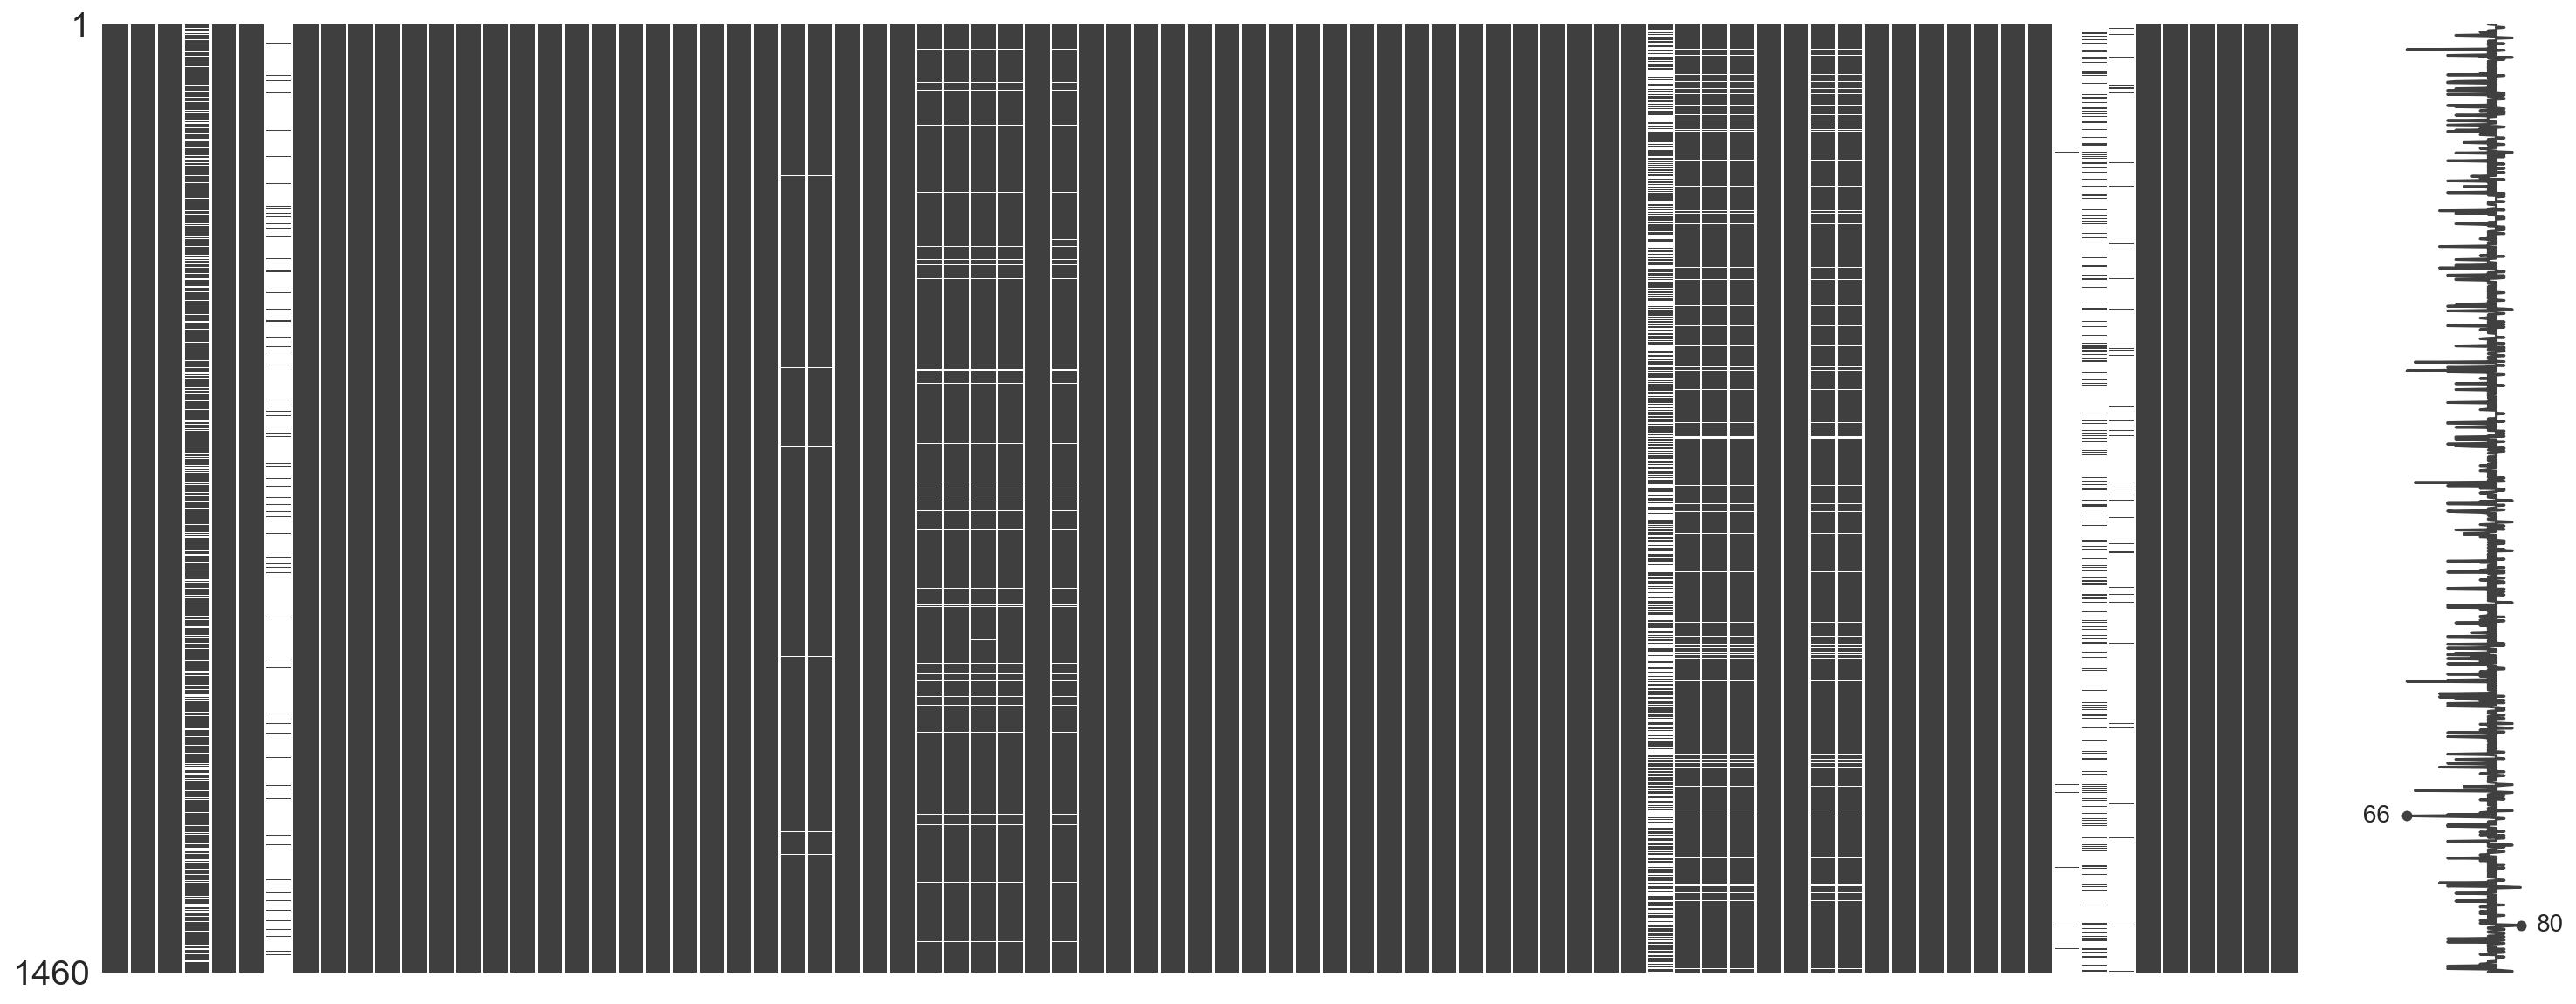

In [82]:
# have a look of the missing value and Dtype of each column
# there is a lot of missing value as see from the graph below
msno.matrix(house)

In [89]:
# find a a percentage of missing value
Na_percent= house.isnull().sum()/len(house)*100
Na_percent= Na_percent.sort_values(ascending= False).head(20)
Na_percent

Na_table=pd.DataFrame({'MissingRate': Na_percent})
print(Na_table)
print(Na_table.shape)

              MissingRate
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
(20, 1)


According to the table above, 19 features have the missing values. I will have a look to the description to find out what the value should be to impute the data to each column. Firstly, the objective of the project is to buy the resident properly to find the cost effectiveness of the property. So, I will delete the properties which is non-resident properties.

In [90]:
# As the data identify the residential place with MSZoning columns, have a look at the MSZoning columns  
house['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [93]:
# delete the non residential property from the data set
house= house.loc[house['MSZoning'] != "C (all)" , :]
# As the C category is the type of property for commercial, I classify it as non residential property.
house.shape
# I deleted 10 rows which are the commercial property out of the data frame

(1450, 81)

|features|missing percentage|desceiption|Impute|meaning|
|---|---|---|---|---|
|PoolQC        |  99.520548|Pool quality| None | No pool|
|MiscFeature   |  96.301370|Miscellaneous feature not covered in other categories|  None | No Miscellaneous feature |
|Alley         |  93.767123|Type of alley access to property|  None |No alley access|
|Fence         |  80.753425|Fence quality |  None | No fence|
|FireplaceQu   |  47.260274|Fireplace quality|  None | No Fireplace|
|LotFrontage   |  17.739726|Linear feet of street connected to property|  0 | No Street or the property is next to the street|
|GarageCond    |   5.547945|Garage condition| None | No Garage|
|GarageType    |   5.547945|Garage location| None | No Garage|
|GarageYrBlt   |   5.547945|Year garage was built| None | Unknown year built or no Garage|
|GarageFinish  |   5.547945|Interior finish of the garage| None | No Garage|
|GarageQual    |   5.547945|Garage quality| None | No Garage|
|BsmtExposure  |   2.602740|Refers to walkout or garden level walls|  None |No Basement|
|BsmtFinType2  |   2.602740|Rating of basement finished area (if multiple types)|  None |No Basement|
|BsmtFinType1  |   2.534247|Rating of basement finished area|  None |No Basement|
|BsmtCond      |   2.534247|the general condition of the basement|  None |No Basement|
|BsmtQual      |   2.534247|the height of the basement|  None | No Basement|
|MasVnrArea    |   0.547945|Masonry veneer area in square feet|  0 | No Masonry veneer|
|MasVnrType    |   0.547945|Masonry veneer type|  None | No Masonry veneer|
|Electrical    |   0.068493|Electrical system |  SBrkr| Standard Circuit Breakers & Romex|

In [98]:
# In the Eletrical column, I found that there is only 1 missing value
#I decide to fill it with the most frequency type(mode) which is SBrkr
house.Electrical.value_counts()

SBrkr    1328
FuseA      90
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [105]:
# For the year garage was built, I decide to impute to None which is unknown year built
house.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1942.0     2
1906.0     1
1927.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 96, dtype: int64

In [104]:
# For the Linear feet of street connected to property, I decided to impute it to zero 
house.LotFrontage.value_counts()

60.0     139
70.0      70
80.0      69
50.0      55
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [106]:
#For the height of the basement, the value is categorical values. So, I will impute it with None
house.BsmtQual.value_counts()

TA    639
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [107]:
#For the Masonry veneer area in square feet, I decided to impute mode to the missing value which is '0'
house.MasVnrArea.value_counts()

0.0      851
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [108]:
#fill null values in Electrical's column with 'SBrkr' 
house['Electrical'].fillna(value= 'SBrkr', inplace= True)
#After having a look at the description of eacg feature, there are 2 categories 
#which should fill Null values with the numeric values: LotFrontage and  MasVnrArea
#the rest should fill with 'None' as there are no values.
#For example, PoolQc and Fence columns, fill none mean there are no pool or fence in the property

#fill null values in LotFrontage's column with 0.0 means Linear feet of street connected to property is 0.0
house['LotFrontage'].fillna(value= 0.0, inplace= True)

#fill null values in MasVnrArea's column with 0.0 means Masonry veneer area in square feet is 0.0
house['MasVnrArea'].fillna(value= 0.0, inplace= True)



# fill the rest of the value will 'None'
house.fillna(value= 'None',inplace=True)


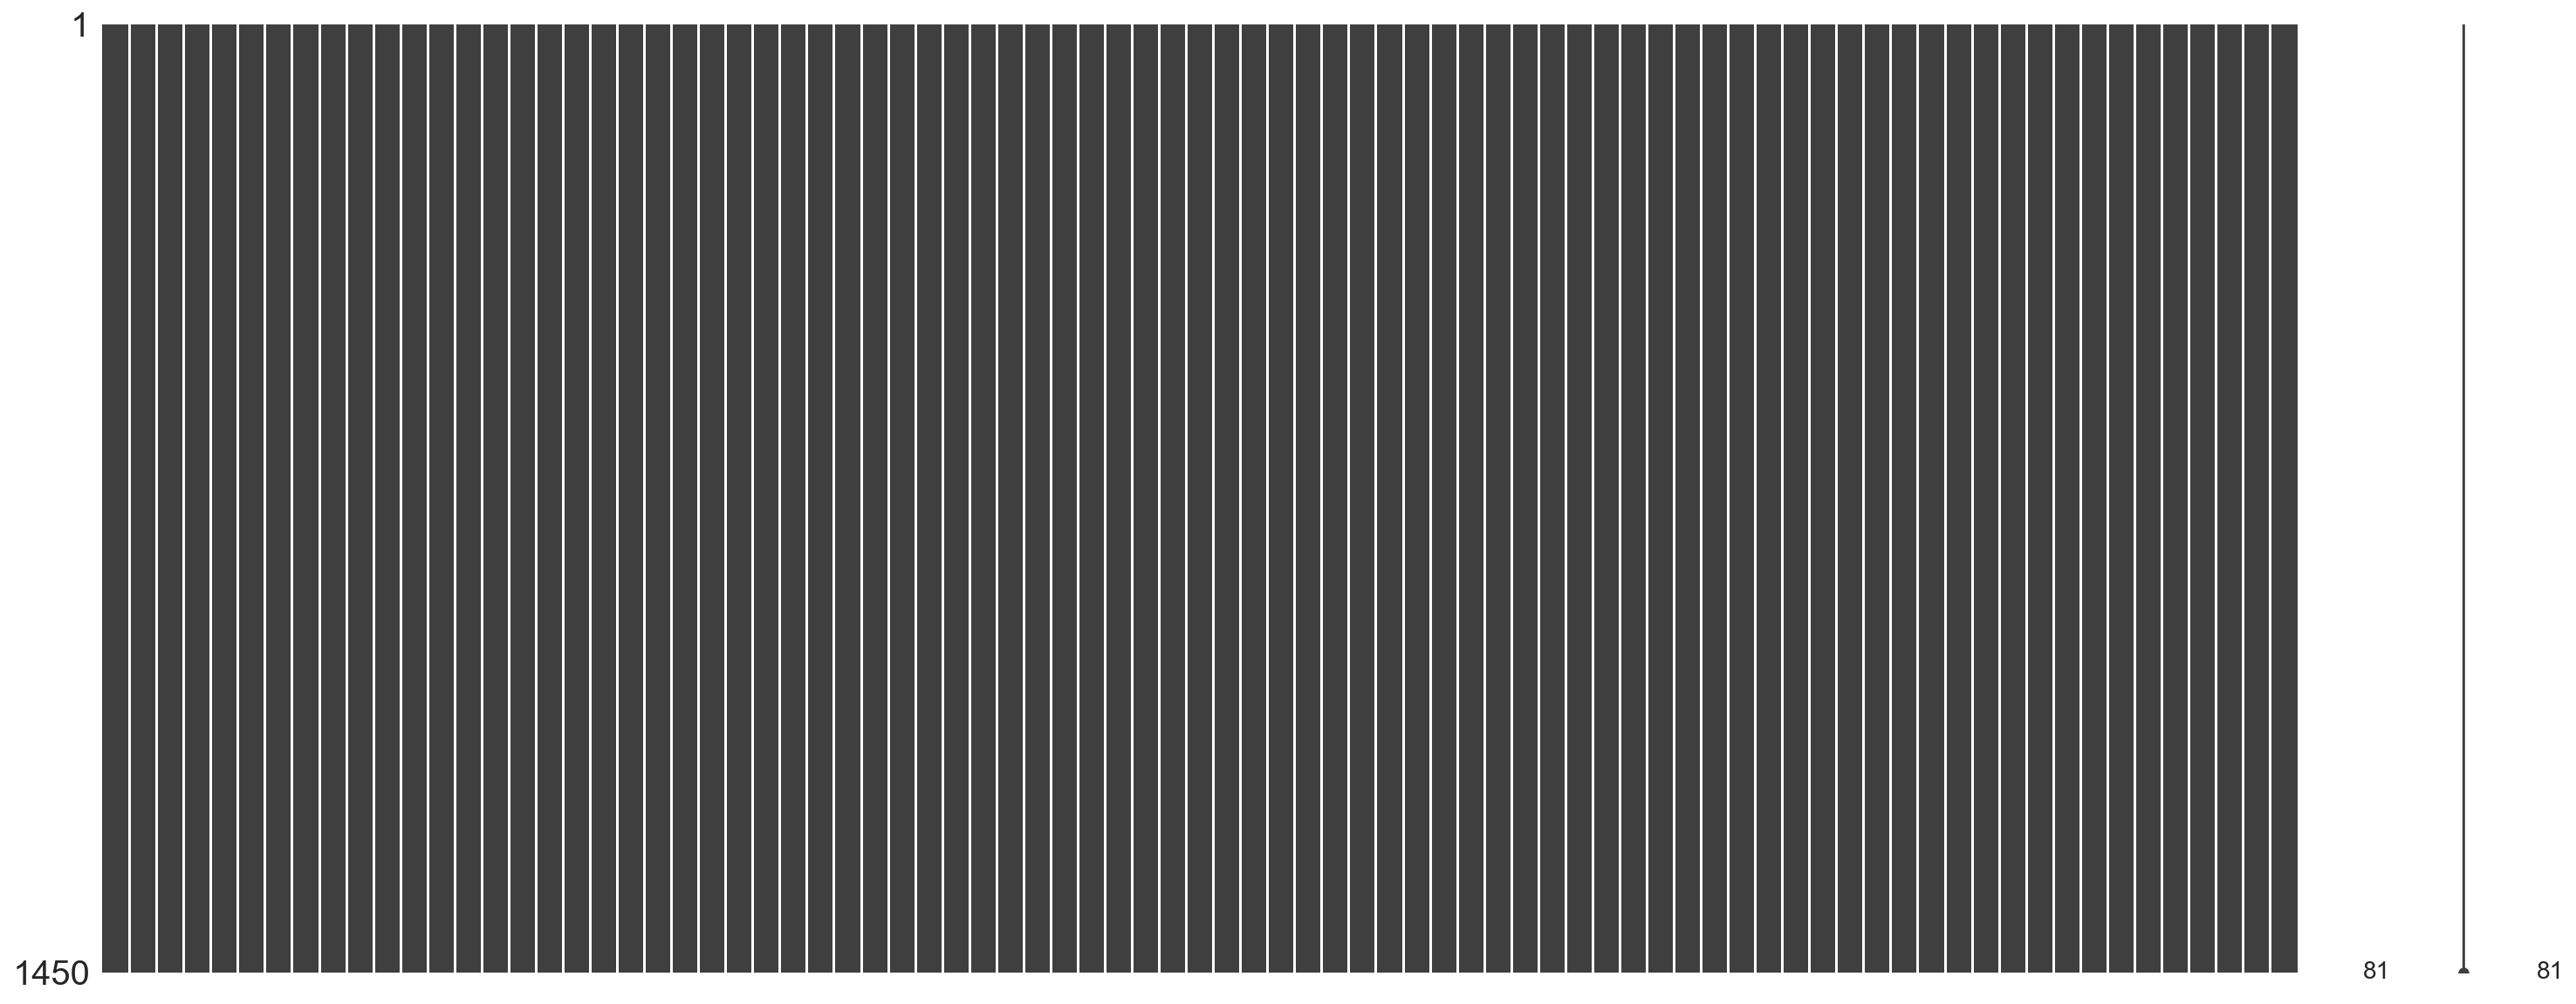

In [74]:
msno.matrix(house)# the graph below shows that all the columns is filled by the None which means there are no spcefic features in the house and the rest is filled by 0 which means there are no features in  these columns

In [75]:
covert_cat= ['MSSubClass','YearBuilt','YearRemodAdd','BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold','OverallQual', 'OverallCond']
house[covert_cat]=house[covert_cat].astype(str)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [76]:
#After cleaning the data, I decide to reset the index of the data to make it more properly
house.reset_index(inplace=True, drop=True)

In [77]:
house

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1         60       RL         65.0     8450   Pave  None      Reg   
1        2         20       RL         80.0     9600   Pave  None      Reg   
2        3         60       RL         68.0    11250   Pave  None      IR1   
3        4         70       RL         60.0     9550   Pave  None      IR1   
4        5         60       RL         84.0    14260   Pave  None      IR1   
...    ...        ...      ...          ...      ...    ...   ...      ...   
1445  1456         60       RL         62.0     7917   Pave  None      Reg   
1446  1457         20       RL         85.0    13175   Pave  None      Reg   
1447  1458         70       RL         66.0     9042   Pave  None      Reg   
1448  1459         20       RL         68.0     9717   Pave  None      Reg   
1449  1460         20       RL         75.0     9937   Pave  None      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0   None   None        None       0   
1            Lvl    AllPub  ...        0   None   None        None       0   
2            Lvl    AllPub  ...        0   None   None        None       0   
3            Lvl    AllPub  ...        0   None   None        None       0   
4            Lvl    AllPub  ...        0   None   None        None       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1445         Lvl    AllPub  ...        0   None   None        None       0   
1446         Lvl    AllPub  ...        0   None  MnPrv        None       0   
1447         Lvl    AllPub  ...        0   None  GdPrv        Shed    2500   
1448         Lvl    AllPub  ...        0   None   None        None       0   
1449         Lvl    AllPub  ...        0   None   None        None       0   

     MoSold YrSold SaleType SaleCondition SalePrice  
0         2   2008       WD        Normal    208500  
1         5   2007       WD        Normal    181500  
2         9   2008       WD        Normal    223500  
3         2   2006       WD       Abnorml    140000  
4        12   2008       WD        Normal    250000  
...     ...    ...      ...           ...       ...  
1445      8   2007       WD        Normal    175000  
1446      2   2010       WD        Normal    210000  
1447      5   2010       WD        Normal    266500  
1448      4   2010       WD        Normal    142125  
1449      6   2008       WD        Normal    147500  

[1450 rows x 81 columns]

In [78]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1450 non-null   int64  
 1   MSSubClass     1450 non-null   object 
 2   MSZoning       1450 non-null   object 
 3   LotFrontage    1450 non-null   float64
 4   LotArea        1450 non-null   int64  
 5   Street         1450 non-null   object 
 6   Alley          1450 non-null   object 
 7   LotShape       1450 non-null   object 
 8   LandContour    1450 non-null   object 
 9   Utilities      1450 non-null   object 
 10  LotConfig      1450 non-null   object 
 11  LandSlope      1450 non-null   object 
 12  Neighborhood   1450 non-null   object 
 13  Condition1     1450 non-null   object 
 14  Condition2     1450 non-null   object 
 15  BldgType       1450 non-null   object 
 16  HouseStyle     1450 non-null   object 
 17  OverallQual    1450 non-null   object 
 18  OverallC